In [31]:
import seaborn as sns
import numpy as np


In [32]:
iris = sns.load_dataset('iris')
X = iris.drop(columns='species')
y = iris.species
# X, y


In [33]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25
)

In [34]:
import scikitplot as skplot
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=80)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80)

Score => 0.9737
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.97        14

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.98      0.97      0.97        38

[[11  0  0]
 [ 0 12  1]
 [ 0  0 14]]


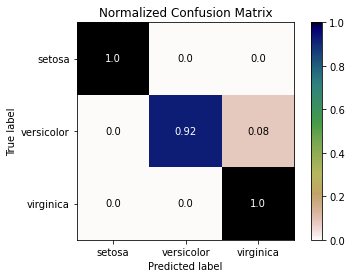

In [35]:
class_names = iris.species.unique()

y_predict = model.predict(X_test)

print('Score => {:.4f}'.format(model.score(X_test, y_test)))
print(classification_report(y_test, y_predict, target_names=class_names))
print(confusion_matrix(y_test, y_predict,))
skplot.metrics.plot_confusion_matrix(y_test, y_predict,
                                    normalize=True,
                                    cmap=plt.cm.gist_earth_r)

import matplotlib.pyplot as plt
plt.show()

# Compare Score of RandomForest & DecisionTree

Score => 0.9474
[[11  0  0]
 [ 0 12  1]
 [ 0  1 13]]


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

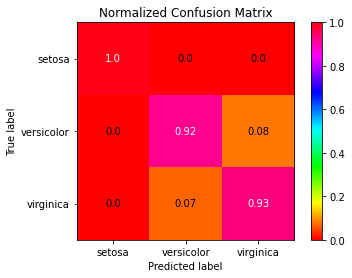

In [46]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_predict = model_tree.predict(X_test)

print('Score => {:.4f}'.format(model_tree.score(X_test, y_test)))
print(confusion_matrix(y_test, y_predict))
skplot.metrics.plot_confusion_matrix(y_test, y_predict,
                                    normalize=True,
                                    cmap=plt.cm.hsv)
